In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()
sns.set_style("dark")

In [2]:
df = pd.read_csv("../free_throws.csv").astype({"period": "int8", "game_id": "int32", "shot_made": "int8"})

In [3]:
df.head()

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013,1,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013,1,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013,1,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18


In [4]:
profile = ProfileReport(df, minimal=True)
profile.to_file("free_throws_profile_report.html")
profile.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 999.83it/s]


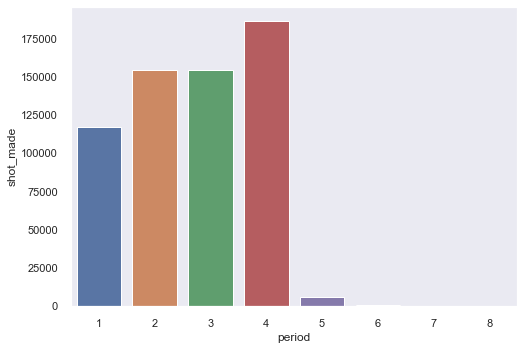

In [5]:
shots_by_period = df.groupby("period").count()["shot_made"]
sns.barplot(shots_by_period.index, shots_by_period);

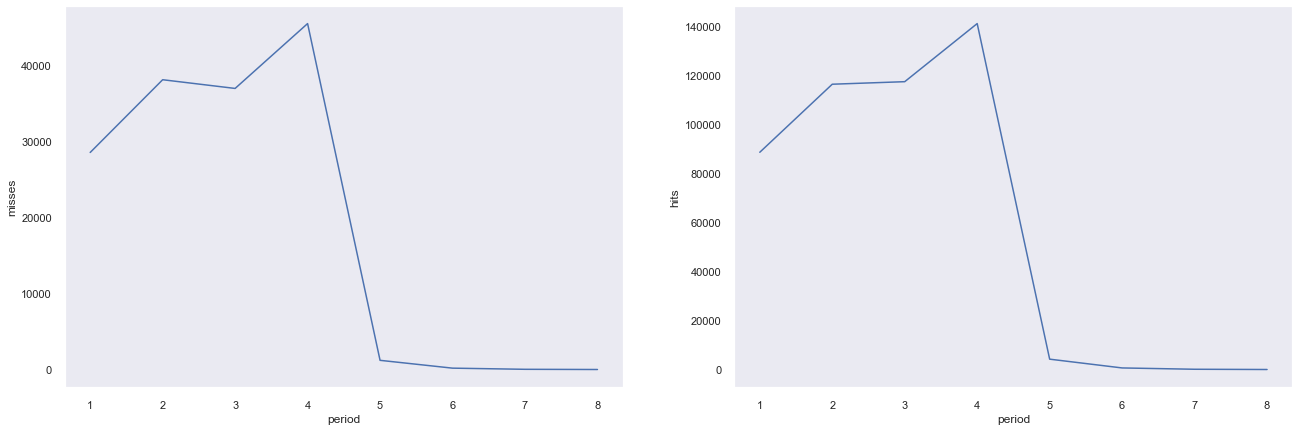

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(22,7)) 
miss_by_period = df[df["shot_made"] == 0].groupby("period").count()["shot_made"]
hit_by_period = df[df["shot_made"] == 1].groupby("period").count()["shot_made"]
sns.lineplot(miss_by_period.index, miss_by_period, ax=axs[0]);
axs[0].set(ylabel="misses")
sns.lineplot(hit_by_period.index, hit_by_period, ax=axs[1]);
axs[1].set(ylabel="hits")
plt.show(fig)

- It seems like the increase in misses is steeper than the hits for period 4 (which makes sense since it's usually the last period in a basketball game so there's more hastiness/clumsiness)

In [7]:
miss_by_player = df[df["shot_made"] == 0].groupby("player").count()["shot_made"]
miss_by_player = miss_by_player[miss_by_player >= 50] # Get the players with big enough sample size
miss_by_player = miss_by_player.rename("misses")
hit_by_player = df[df["shot_made"] == 1].groupby("player").count()["shot_made"]
hit_by_player = hit_by_player[hit_by_player >= 200] # Get the players with big enough sample size
hit_by_player = hit_by_player.rename("hits")
player_accuracy = pd.concat([miss_by_player, hit_by_player], axis=1).dropna()
player_accuracy["accuracy"] = ((player_accuracy["hits"] / (player_accuracy["hits"] + player_accuracy["misses"])) * 100).round(2)
player_accuracy = player_accuracy.sort_values(by="accuracy", ascending=False)
fig = px.scatter(data_frame=player_accuracy, x="misses", y="hits", hover_name=player_accuracy.index)
fig1 = px.scatter(data_frame=player_accuracy, x=player_accuracy.index, y="accuracy", hover_data=["misses", "hits"])
fig.show()
fig1.show()

In [8]:
overall_accuracy = df["shot_made"].value_counts()
overall_accuracy = round(overall_accuracy.loc[1] / (overall_accuracy.loc[1] + overall_accuracy.loc[0]) * 100, 2,)
print(f"Overall accuracy of all players: {overall_accuracy}%")

Overall accuracy of all players: 75.68%


There are a couple obvious outliers:
- Dwight Howard has got a lot of misses (3402) for 4302 hits.
- Lebron James only has just over 2000 misses for almost 6000 hits.
- Kevin Durant has 87.78% accuracy which is impressive for the number of shots he has thrown.